In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df =pd.read_csv("D:/2nd-sem/data-science_workflow/part-2/airbnb_price_prediction/data/cleaned/clean_airbnb_data.csv")

In [5]:
df.head()

,price,accommodates,bedrooms,minimum_nights,availability_365,number_of_reviews,review_scores_rating,bathrooms,room_type_Hotel room,room_type_Private room,...,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire serviced apartment,property_type_Other,property_type_Private room in condo,property_type_Private room in home,property_type_Private room in hostel,property_type_Private room in rental unit,property_type_Room in hotel,distance_to_center
0,105.0,2,1.0,63,250,149,4.63,1.0,0,0,...,0,1,0,0,0,0,0,0,0,1.860321
1,135.0,7,4.0,6,193,7,5.00,2.5,0,0,...,0,1,0,0,0,0,0,0,0,1.664484
2,75.0,1,1.0,150,262,26,4.68,1.0,0,0,...,0,1,0,0,0,0,0,0,0,3.129226
3,28.0,2,1.0,92,111,298,4.77,1.0,0,0,...,0,1,0,0,0,0,0,0,0,3.083494
4,53.0,2,2.0,93,52,182,4.70,1.0,0,0,...,0,1,0,0,0,0,0,0,0,1.914578


In [7]:
df.columns

Index(['price', 'accommodates', 'bedrooms', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'bathrooms', 'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'neighbourhood_cleansed_Brunnenstr. Süd',
       'neighbourhood_cleansed_Frankfurter Allee Süd FK',
       'neighbourhood_cleansed_Karl-Marx-Allee-Süd',
       'neighbourhood_cleansed_Other',
       'neighbourhood_cleansed_Prenzlauer Berg Süd',
       'neighbourhood_cleansed_Prenzlauer Berg Südwest',
       'neighbourhood_cleansed_Reuterstraße',
       'neighbourhood_cleansed_Schöneberg-Nord',
       'neighbourhood_cleansed_Tempelhofer Vorstadt',
       'neighbourhood_cleansed_südliche Luisenstadt',
       'property_type_Entire home', 'property_type_Entire loft',
       'property_type_Entire rental unit',
       'property_type_Entire serviced apartment', 'property_type_Other',
       'property_type_Private room in condo',
       'property_type_Private ro

In [9]:
print(df.isnull().sum())

price                                              0
accommodates                                       0
bedrooms                                           0
minimum_nights                                     0
availability_365                                   0
number_of_reviews                                  0
review_scores_rating                               0
bathrooms                                          0
room_type_Hotel room                               0
room_type_Private room                             0
room_type_Shared room                              0
neighbourhood_cleansed_Brunnenstr. Süd             0
neighbourhood_cleansed_Frankfurter Allee Süd FK    0
neighbourhood_cleansed_Karl-Marx-Allee-Süd         0
neighbourhood_cleansed_Other                       0
neighbourhood_cleansed_Prenzlauer Berg Süd         0
neighbourhood_cleansed_Prenzlauer Berg Südwest     0
neighbourhood_cleansed_Reuterstraße                0
neighbourhood_cleansed_Schöneberg-Nord        

In [11]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)  # All columns except 'price'
y = df['price']               # Target variable

In [13]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Step 4: Baseline model using NumPy
mean_price = np.mean(y_train)
y_pred_baseline = np.full(shape=y_test.shape, fill_value=mean_price)

# Evaluate baseline model
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline RMSE: {rmse_baseline:.2f}")
print(f"Baseline R² Score: {r2_baseline:.2f}")


Baseline RMSE: 101.28
Baseline R² Score: -0.00


In [17]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.2f}")


Linear Regression RMSE: 70.15
Linear Regression R² Score: 0.52


In [19]:
# Step 6: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R² Score: {r2_rf:.2f}")


Random Forest RMSE: 64.80
Random Forest R² Score: 0.59


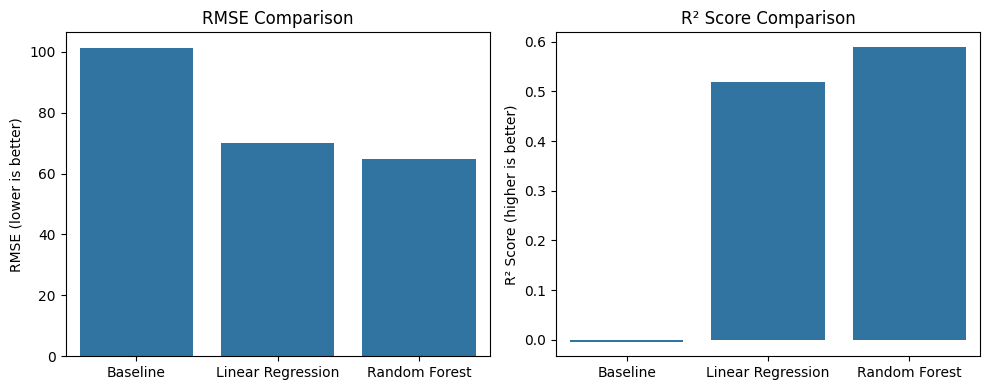

In [20]:
# Plot model performances
model_names = ['Baseline', 'Linear Regression', 'Random Forest']
rmse_scores = [rmse_baseline, rmse_lr, rmse_rf]
r2_scores = [r2_baseline, r2_lr, r2_rf]

# RMSE Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=rmse_scores)
plt.title('RMSE Comparison')
plt.ylabel('RMSE (lower is better)')

# R² Plot
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_scores)
plt.title('R² Score Comparison')
plt.ylabel('R² Score (higher is better)')

plt.tight_layout()
plt.show()


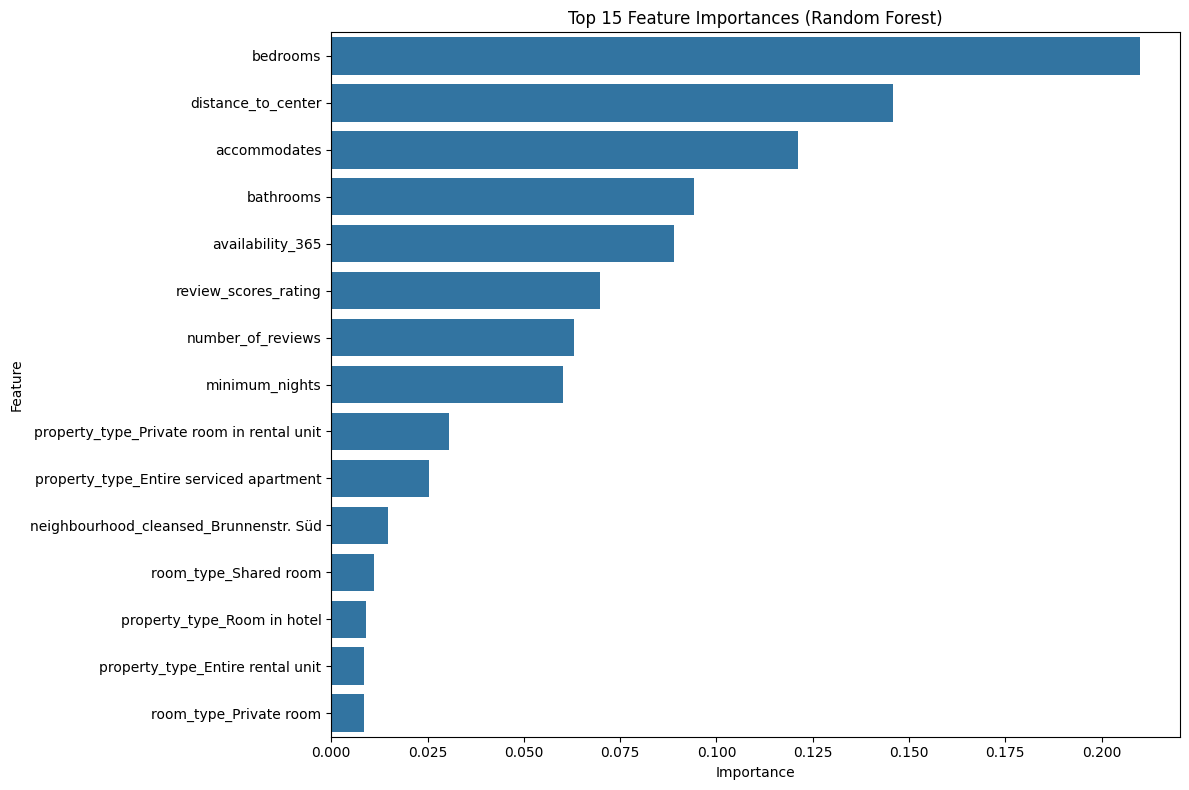

In [23]:
# Feature Importance from Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15
plt.figure(figsize=(12, 8))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler

In [27]:
# Scale only the input features (not the target)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Build a simple neural network with 2 hidden layers
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [31]:
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 23639.3418 - mae: 126.0287 - val_loss: 11898.2930 - val_mae: 76.7797
Epoch 2/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7274.5942 - mae: 55.5786 - val_loss: 4133.7329 - val_mae: 42.2074
Epoch 3/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4035.5029 - mae: 40.1363 - val_loss: 3919.5300 - val_mae: 41.1053
Epoch 4/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4551.0635 - mae: 40.1232 - val_loss: 3855.3416 - val_mae: 40.5336
Epoch 5/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3674.6414 - mae: 39.7108 - val_loss: 3799.2905 - val_mae: 40.5290
Epoch 6/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3827.5549 - mae: 39.4418 - val_loss: 3770.2407 - val_mae: 40.1101
Epoch 7/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4056.4104 - mae: 39.2448 - val_loss: 3744.9465 - val_mae: 40.1886
Epoch 8/100
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3767.5549 - mae: 38.7234 - val_loss: 3708.5989 

In [33]:
# Predict
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Metrics
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network RMSE: {rmse_nn:.2f}")
print(f"Neural Network R² Score: {r2_nn:.2f}")


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Neural Network RMSE: 67.09
Neural Network R² Score: 0.56


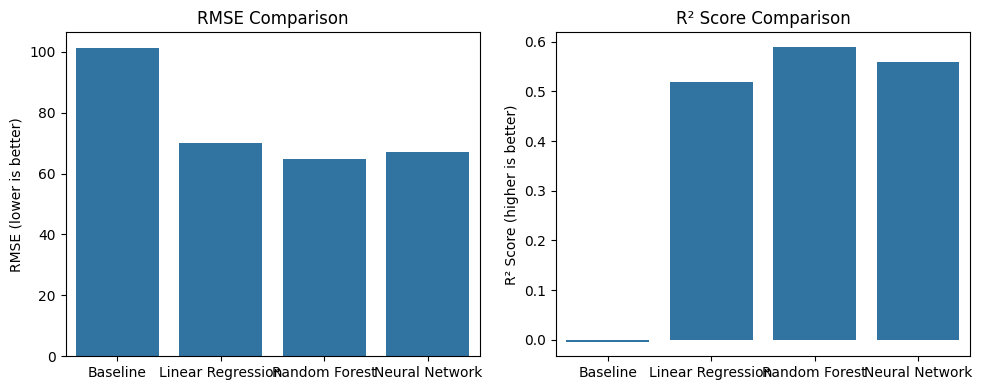

In [35]:
# Updated comparison
model_names = ['Baseline', 'Linear Regression', 'Random Forest', 'Neural Network']
rmse_scores = [rmse_baseline, rmse_lr, rmse_rf, rmse_nn]
r2_scores = [r2_baseline, r2_lr, r2_rf, r2_nn]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=rmse_scores)
plt.title('RMSE Comparison')
plt.ylabel('RMSE (lower is better)')

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_scores)
plt.title('R² Score Comparison')
plt.ylabel('R² Score (higher is better)')

plt.tight_layout()
plt.show()
